In [47]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd 
import seaborn as sns
from ruamel.yaml import YAML
import matplotlib.ticker as ticker
from scipy.interpolate import interp1d
from sklearn.preprocessing import StandardScaler
import os
import sys 
sys.path.append("../src")
from Fitness.AED_ML import Calculate_AED_ML
from Fitness.AED import Calculate_AED
from Fitness.Brookesia import Calculate_Brookesia
from Fitness.ORCH import Calculate_ORCH
from Fitness.PMO import Calculate_PMO


In [15]:
yaml = YAML()
main_path = os.getcwd()
with open("../data/Info_species_fitness.yaml", "r") as f:
    input = yaml.load(f)
Name_Folder = "0D"
flag_output= True

species = [species for species, values in input.items() if values["AED"] == 1]

Brookesia = [species for species, values in input.items() if values["Brookesia"] == 1]

data_d = pd.read_csv(f"/work/kotlarcm/WORK/Automated_Reduced/{Name_Folder}/Processing_Detailed.csv")
data_r = pd.read_csv(f"/work/kotlarcm/WORK/Automated_Reduced/{Name_Folder}/Processing_Reduced.csv")
data_a = pd.read_csv(f"/work/kotlarcm/WORK/Automated_Reduced/{Name_Folder}/Processing_OptimA.csv")
data_b = pd.read_csv(f"/work/kotlarcm/WORK/Automated_Reduced/{Name_Folder}/Processing_OptimB.csv")

case = data_d["P_Init"].nunique()*  data_d["T_Init"].nunique()  *  data_d["Phi_Init"].nunique()  *  data_d["Mixt_Init"].nunique() 
lenght= int(data_d.shape[0]/ case)

In [16]:
EAD_ML_R_TOT,EAD_ML_R  = Calculate_AED_ML(data_d,data_r,input,main_path,flag_output) 
EAD_ML_A_TOT,EAD_ML_A  = Calculate_AED_ML(data_d,data_a,input,main_path,flag_output) 
EAD_ML_B_TOT,EAD_ML_B  = Calculate_AED_ML(data_d,data_b,input,main_path,flag_output) 
Tot_R_EADML = pd.DataFrame(0.0, index=range(case), columns=EAD_ML_R.columns)
Tot_A_EADML = pd.DataFrame(0.0, index=range(case), columns=EAD_ML_R.columns)
Tot_B_EADML = pd.DataFrame(0.0, index=range(case), columns=EAD_ML_R.columns)

for c in range(case): 
    loc_err_reduced = EAD_ML_R.iloc[c*lenght:c*lenght+lenght]
    loc_err_optimA = EAD_ML_A.iloc[c*lenght:c*lenght+lenght]
    loc_err_optimB = EAD_ML_B.iloc[c*lenght:c*lenght+lenght]
    for s in EAD_ML_R.columns : 
        Tot_R_EADML.at[c, s] =  loc_err_reduced[s].sum()
        Tot_A_EADML.at[c, s] = loc_err_optimA[s].sum()
        Tot_B_EADML.at[c, s] = loc_err_optimB[s].sum()


Err AED ML = 2.12E+05
Err AED ML = 1.77E+05
Err AED ML = 1.57E+05


In [17]:
EAD_R_TOT,EAD_R  = Calculate_AED(data_d,data_r,input,main_path,flag_output) 
EAD_A_TOT,EAD_A  = Calculate_AED(data_d,data_a,input,main_path,flag_output) 
EAD_B_TOT,EAD_B  = Calculate_AED(data_d,data_b,input,main_path,flag_output) 

Tot_R_EAD = pd.DataFrame(0.0, index=range(case), columns=EAD_ML_R.columns)
Tot_A_EAD = pd.DataFrame(0.0, index=range(case), columns=EAD_ML_R.columns)
Tot_B_EAD = pd.DataFrame(0.0, index=range(case), columns=EAD_ML_R.columns)

for c in range(case): 
    loc_err_reduced = EAD_R.iloc[c*lenght:c*lenght+lenght]
    loc_err_optimA = EAD_A.iloc[c*lenght:c*lenght+lenght]
    loc_err_optimB = EAD_B.iloc[c*lenght:c*lenght+lenght]
    for s in EAD_ML_R.columns : 
        Tot_R_EAD.at[c, s] =  loc_err_reduced[s].sum()
        Tot_A_EAD.at[c, s] = loc_err_optimA[s].sum()
        Tot_B_EAD.at[c, s] = loc_err_optimB[s].sum()


Err AED = 9.36E+06
Err AED = 7.95E+06
Err AED = 5.79E+06


In [18]:
Err_s_red,Err_T_red,Err_IDT_red = Calculate_Brookesia(data_d,data_r,input,main_path,flag_output)
Err_s_red_A,Err_T_red_A ,Err_IDT_red_A= Calculate_Brookesia(data_d,data_a,input,main_path,flag_output)
Err_s_red_B,Err_T_red_B,Err_IDT_red_B = Calculate_Brookesia(data_d,data_b,input,main_path,flag_output)

Tot_R_BROOK = pd.DataFrame(0.0, index=range(case), columns=Brookesia+["T"] +["IDT"])
Tot_A_BROOK = pd.DataFrame(0.0, index=range(case), columns=Brookesia+["T"] +["IDT"])
Tot_B_BROOK = pd.DataFrame(0.0, index=range(case), columns=Brookesia+["T"] +["IDT"])
Tot_R_BROOK[Brookesia] =Err_s_red
Tot_A_BROOK[Brookesia] =Err_s_red_A
Tot_B_BROOK[Brookesia] =Err_s_red_B

Tot_R_BROOK["T"] =Err_T_red
Tot_A_BROOK["T"]=Err_T_red_A
Tot_B_BROOK["T"]=Err_T_red_B

Tot_R_BROOK["IDT"] =Err_IDT_red
Tot_A_BROOK["IDT"]=Err_IDT_red_A
Tot_B_BROOK["IDT"]=Err_IDT_red_B

Err BROOKESIA mean =1.09E+01
Err BROOKESIA max =1.38E+00
Err BROOKESIA mean =1.83E+01
Err BROOKESIA max =1.48E+00
Err BROOKESIA mean =1.32E+01
Err BROOKESIA max =1.70E+00


In [26]:
Err_R, Err_Reduced_Species ,Err_Reduced_Species_Coef = Calculate_ORCH(data_d,data_r,input,main_path,flag_output)
Err_A, Err_OptimA_Species ,Err_OptimA_Species_Coef = Calculate_ORCH(data_d,data_a,input,main_path,flag_output)
Err_B, Err_OptimB_Species ,Err_OptimB_Species_Coef = Calculate_ORCH(data_d,data_b,input,main_path,flag_output)

Tot_R_ORCh = pd.DataFrame(0.0, index=range(case), columns=species)
Tot_A_ORCh = pd.DataFrame(0.0, index=range(case), columns=species)
Tot_B_ORCh = pd.DataFrame(0.0, index=range(case), columns=species)

for c in range(case): 
    loc_err_reduced = Err_Reduced_Species.iloc[c*lenght:c*lenght+lenght]
    loc_err_optimA = Err_OptimA_Species.iloc[c*lenght:c*lenght+lenght]
    loc_err_optimB = Err_OptimB_Species.iloc[c*lenght:c*lenght+lenght]
    
    for s in species: 
        k = input[s]["coefficient"] if input[s]["coefficient"] is not None else 0.05
        
        Tot_R_ORCh.at[c, s] = k * loc_err_reduced[s].sum()
        Tot_A_ORCh.at[c, s] = k * loc_err_optimA[s].sum()
        Tot_B_ORCh.at[c, s] = k * loc_err_optimB[s].sum()


Err ORCH = 2.66e+08
Err ORCH = 1.02e+08
Err ORCH = 4.56e+09


In [31]:
Err_R_pmo,F1r,F2r,F3r,F4r = Calculate_PMO(data_d,data_r,input,main_path,flag_output)
Err_A_pmo,F1o,F2o,F3o,F4o = Calculate_PMO(data_d,data_a,input,main_path,flag_output)
Err_B_pmo,F1ob,F2ob,F3ob,F4ob = Calculate_PMO(data_d,data_b,input,main_path,flag_output)
integrate_species = [species for species, values in input.items() if values["Integrate"] == 1]
peak_species = [species for species, values in input.items() if values["Peak"] == 1]


Tot_R_PMO = pd.DataFrame(columns=["F1","F2","F3","F4"]) 
Tot_A_PMO  = pd.DataFrame(columns=["F1","F2","F3","F4"]) 
Tot_B_PMO = pd.DataFrame(columns=["F1","F2","F3","F4"]) 
Tot_R_PMO["F1"] = np.sum(F1r,axis=1)
Tot_R_PMO["F2"] = np.sum(F2r,axis=1)
Tot_R_PMO["F3"] = F3r
Tot_R_PMO["F4"] = F4r

Tot_A_PMO["F1"] = np.sum(F1o, axis=1)
Tot_A_PMO["F2"] = np.sum(F2o, axis=1)
Tot_A_PMO["F3"] = F3o
Tot_A_PMO["F4"] = F4o

Tot_B_PMO["F1"] = np.sum(F1ob, axis=1)
Tot_B_PMO["F2"] = np.sum(F2ob, axis=1)
Tot_B_PMO["F3"] = F3ob
Tot_B_PMO["F4"] = F4ob

Err PMO = 8.02e+00
Err PMO = 6.37e+00
Err PMO = 6.98e+00


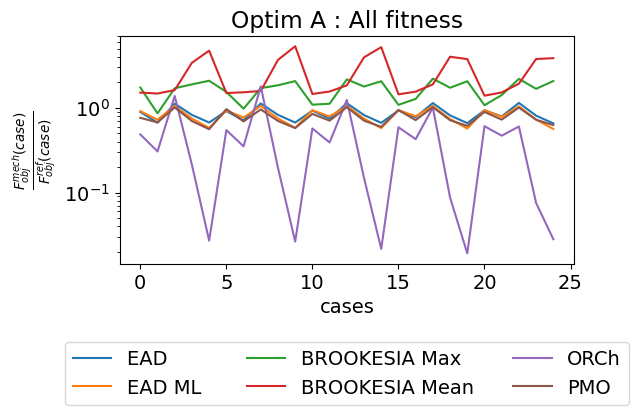

In [52]:
plt.rcParams.update({'font.size': 14})
plt.plot(Tot_A_EAD.sum(axis=1)/Tot_R_EAD.sum(axis=1),label="EAD ")
plt.plot(Tot_A_EADML.sum(axis=1)/Tot_R_EADML.sum(axis=1),label="EAD ML ")
plt.plot(Tot_R_BROOK.max(axis=1)/Tot_A_BROOK.max(axis=1),label="BROOKESIA Max")
plt.plot(Tot_R_BROOK.mean(axis=1)/Tot_A_BROOK.mean(axis=1),label="BROOKESIA Mean")
plt.plot(Tot_A_ORCh.sum(axis=1)/Tot_R_ORCh.sum(axis=1),label="ORCh")
plt.plot(Tot_A_PMO.sum(axis=1)**(1/2)/Tot_R_PMO.sum(axis=1)**(1/2),label="PMO")
plt.ylabel(r"$\frac{F_{obj}^{mech}(case)}{F_{obj}^{ref}(case)} $")
plt.xlabel("cases")
plt.yscale("log")
plt.title("Optim A : All fitness")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=3)
plt.tight_layout()
plt.savefig("F_Fref_OptimA.png")

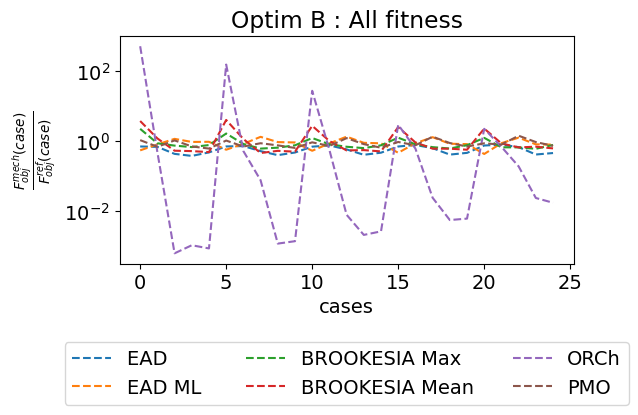

In [55]:
plt.rcParams.update({'font.size': 14})
plt.plot(Tot_B_EAD.sum(axis=1)/Tot_R_EAD.sum(axis=1),'--',label="EAD ")
plt.plot(Tot_B_EADML.sum(axis=1)/Tot_R_EADML.sum(axis=1),'--',label="EAD ML ")
plt.plot(Tot_R_BROOK.max(axis=1)/Tot_B_BROOK.max(axis=1),'--',label="BROOKESIA Max")
plt.plot(Tot_R_BROOK.mean(axis=1)/Tot_B_BROOK.mean(axis=1),'--',label="BROOKESIA Mean")
plt.plot(Tot_B_ORCh.sum(axis=1)/Tot_R_ORCh.sum(axis=1),'--',label="ORCh")
plt.plot(Tot_B_PMO.sum(axis=1)**(1/2)/Tot_R_PMO.sum(axis=1)**(1/2),'--',label="PMO")
plt.ylabel(r"$\frac{F_{obj}^{mech}(case)}{F_{obj}^{ref}(case)} $")
plt.xlabel("cases")
plt.yscale("log")
plt.title("Optim B : All fitness")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=3)
plt.tight_layout()
plt.savefig("F_Fref_OptimB.png")

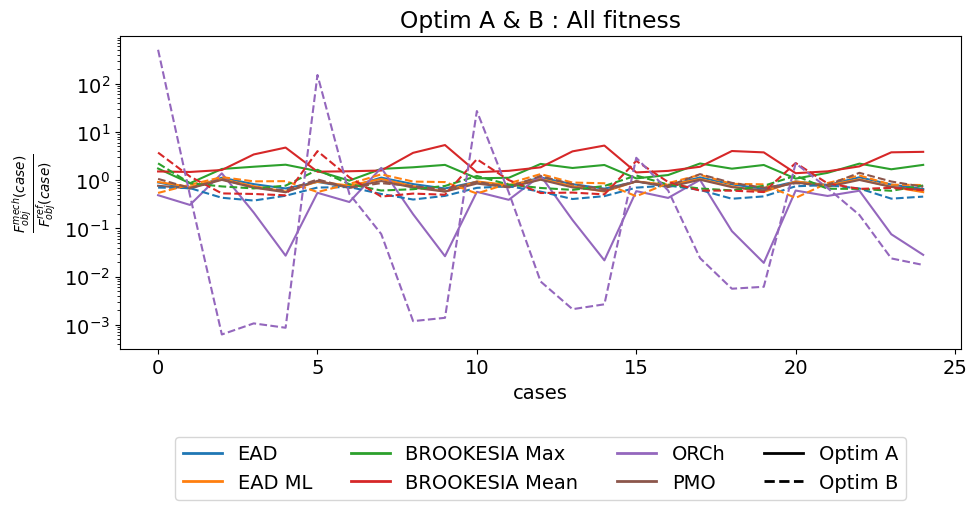

In [54]:

plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10, 6))

# Définir un mapping méthode → couleur
colors = {
    "EAD": "#1f77b4",       # Bleu
    "EAD ML": "#ff7f0e",    # Orange
    "BROOKESIA Max": "#2ca02c",  # Vert
    "BROOKESIA Mean": "#d62728", # Rouge
    "ORCh": "#9467bd",      # Violet
    "PMO": "#8c564b"        # Marron
}

# Groupe A – traits pleins
plt.plot(Tot_A_EAD.sum(axis=1)/Tot_R_EAD.sum(axis=1),
         label="EAD [A]", linestyle='-', color=colors["EAD"])
plt.plot(Tot_A_EADML.sum(axis=1)/Tot_R_EADML.sum(axis=1),
         label="EAD ML [A]", linestyle='-', color=colors["EAD ML"])
plt.plot(Tot_R_BROOK.max(axis=1)/Tot_A_BROOK.max(axis=1),
         label="BROOKESIA Max [A]", linestyle='-', color=colors["BROOKESIA Max"])
plt.plot(Tot_R_BROOK.mean(axis=1)/Tot_A_BROOK.mean(axis=1),
         label="BROOKESIA Mean [A]", linestyle='-', color=colors["BROOKESIA Mean"])
plt.plot(Tot_A_ORCh.sum(axis=1)/Tot_R_ORCh.sum(axis=1),
         label="ORCh [A]", linestyle='-', color=colors["ORCh"])
plt.plot(Tot_A_PMO.sum(axis=1)**0.5 / Tot_R_PMO.sum(axis=1)**0.5,
         label="PMO [A]", linestyle='-', color=colors["PMO"])

# Groupe B – mêmes couleurs, traits discontinus
plt.plot(Tot_B_EAD.sum(axis=1)/Tot_R_EAD.sum(axis=1),
         label="EAD [B]", linestyle='--', color=colors["EAD"])
plt.plot(Tot_B_EADML.sum(axis=1)/Tot_R_EADML.sum(axis=1),
         label="EAD ML [B]", linestyle='--', color=colors["EAD ML"])
plt.plot(Tot_R_BROOK.max(axis=1)/Tot_B_BROOK.max(axis=1),
         label="BROOKESIA Max [B]", linestyle='--', color=colors["BROOKESIA Max"])
plt.plot(Tot_R_BROOK.mean(axis=1)/Tot_B_BROOK.mean(axis=1),
         label="BROOKESIA Mean [B]", linestyle='--', color=colors["BROOKESIA Mean"])
plt.plot(Tot_B_ORCh.sum(axis=1)/Tot_R_ORCh.sum(axis=1),
         label="ORCh [B]", linestyle='--', color=colors["ORCh"])
plt.plot(Tot_B_PMO.sum(axis=1)**0.5 / Tot_R_PMO.sum(axis=1)**0.5,
         label="PMO [B]", linestyle='--', color=colors["PMO"])

# Axes & titre
plt.ylabel(r"$\frac{F_{obj}^{mech}(case)}{F_{obj}^{ref}(case)}$")
plt.xlabel("cases")
plt.yscale("log")
plt.title("Optim A & B : All fitness")

legend_elements = [
    Line2D([0], [0], color=colors["EAD"], lw=2, label='EAD'),
    Line2D([0], [0], color=colors["EAD ML"], lw=2, label='EAD ML'),
    Line2D([0], [0], color=colors["BROOKESIA Max"], lw=2, label='BROOKESIA Max'),
    Line2D([0], [0], color=colors["BROOKESIA Mean"], lw=2, label='BROOKESIA Mean'),
    Line2D([0], [0], color=colors["ORCh"], lw=2, label='ORCh'),
    Line2D([0], [0], color=colors["PMO"], lw=2, label='PMO'),
    Line2D([0], [0], color='black', lw=2, linestyle='-', label='Optim A'),
    Line2D([0], [0], color='black', lw=2, linestyle='--', label='Optim B'),
]

plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=4)

#
plt.tight_layout(rect=[0, 0, 1, 0.95])
# plt.grid(True, which='both', linestyle='--', alpha=0.3)
plt.savefig("F_Fref.png")